## Approximation numérique de la fonction carrée

$$
\int_0^1 x^p dx = \frac{1}{p+1}
$$

In [5]:
import numpy as np

p=4
def power(x):
    """fonction carrée"""
    return x**p


def rect_gauche(f, N, a=0, b=1):
    """Applique la méthode des rectangles a gauche pour f sur n rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(N-1):
        I += h * f(xs[i])

#     I = (h * f(xs[:-1])).sum()

    return I


def pt_milieu(f, N, a=0, b=1):
    """Applique la méthode du point milieu pour f sur n rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(N-1):
        I += h * f( (xs[i] + xs[i+1])/2 )
    return I


def simpson(f, N, a=0, b=1):
    """Applique la méthode de Simpson pour f sur n rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(N-1):
        I += h/6 * ( f(xs[i]) + 4*f( (xs[i]+xs[i+1])/2 ) + f(xs[i+1]) )
    return I


N = 10**4
rect_gauche(power, N )

0.19994999833349997

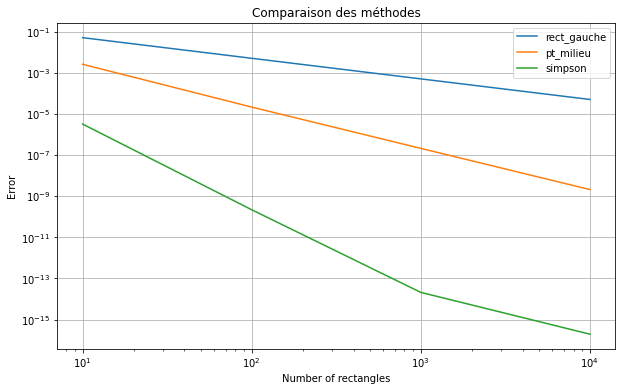

In [22]:
import matplotlib.pyplot as plt
Ns = [10**i for i in range(1,5)]
methodes = [rect_gauche, pt_milieu, simpson]

plt.figure(figsize=(10,6))
p=5
for methode in methodes:
    
    erreurs = []
    for N in Ns:
        approx_num = methode(power, N)
        erreur = abs(approx_num - 1/(p+1))
        erreurs.append(erreur)

    plt.plot(Ns, erreurs,label=methode.__name__)



plt.loglog();
plt.legend();
plt.grid(); plt.xlabel("Number of rectangles"); plt.ylabel('Error');
plt.title("Comparaison des méthodes");